# Lab Solution - Hidden Markov Models to Predict Behaviour
This notebook serves as the starter code and lab description for the Lab covering **Chapter 14 - Probabilistic Reasoning over Time** from the book *Artificial Intelligence: A Modern Approach.*

In [1]:
#pip install hmmlearn
#pip install pandas
#pip install numpy
#pip install matplotlib
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
np.random.seed(42)

## OVERVIEW
We didn't have enough time to cover all the material in Chapter 14 (Probabilistic Reasoning over Time). One important part of that chapter is section 14.3 which discusses Hidden Markov Models (HMMs). 

In this lab, we learn what HMMs are and try a relatively simple and easy application of them in behaviour prediction. Due to time considrations, we will not implement the HMM model but rather use a proper implementation of it in `hmmlearn` library. The content and ideas of this lab are from [A story of the morning insanity](https://zerowithdot.com/hidden-markov-model-morning-insanity/). 

## So what's the story?

Picture the following scenario: It's at 7 a.m. You're preparing to go to work. In practice, it means that you are running like crazy between different rooms. You spend some random amount of time in each, doing something, hoping to get everything you need to be sorted before you leave.

**To make things worse**, your girlfriend (or boyfriend) has *cats*. The little furball wants to eat. Due to the morning hustle, it is uncertain whether you would remember to feed it. If you don't, the cats will be upset, and so will your girlfriend if she finds out.

Say your flat has four **rooms**. That is to include the *kitchen*, *bathroom*, *living room* and *bedroom*. You spend some random amount of time in each, and transition between the rooms with a certain probability. At the same time, where ever you go, you are likely to make some distinct kinds of **noises**. Your girlfriend hears these noises and, despite being still asleep, she can infer in which room you are spending your time.

And so she does that day by day. She wants to make sure that you do feed the cats.

However, since she can't be there, all she can do is to place the cat food bag in a room where you supposedly **stay the longest**. Hopefully, that will increase the chances that you do feed the "beast" (and save your evening).


## Modeling the situation
We want to use Hidden Markov Models to help your girlfriend (or boyfriend) find the room in which you stay the longest. For startes, I need you to get out there and start reading about HMMs. In your own words answer the following questions:

In [ ]:
# TODO answer the following questions

1. What kind of models are HMMs (briefly explain what you understood)?


2. What are hidden states in HMM (in our example "rooms" are hidden states)?


3. What are observations in HMM (in our example "noises" are observations)?


4. What do transition probabilities (matrix **A** in the future cells) represent?


5. What do emission probabilities (matrix **B** in the future cells) represent?


6. What do initial state probabilities (vector **$\pi$** in the future cells) represent?



Using your current understanding of HMMs lets try to use one such model to solve our problem. 
First lets create a hard-coded version of HMM in which we fill in **A**, **B**, and **$\pi$** (we use **pi** instead of actual letter $\pi$ in coding cells). Lets create the model parameters and take a look at them. Based on your current understanding, try to explain why we have designed them this way.

In [2]:
rooms = ['Bathroom', 'Bedroom', 'Kitchen', 'Living Room']
noises = ['Coffee','Dishes','Flushing','Radio','Shower','Silence','Television','Toothbrush','Wardrobe']

A = pd.DataFrame(np.array([[0.90, 0.08, 0.01, 0.01], [0.01, 0.90, 0.05, 0.04], [0.03, 0.02, 0.85, 0.10], [0.05, 0.02, 0.23, 0.70]]), columns=rooms, index=rooms)
B = pd.DataFrame(np.array([[0.01,0.01,0.20,0.01,0.30,0.05,0.01,0.40,0.01],[0.01,0.01,0.01,0.10,0.01,0.30,0.05,0.01,0.50], [0.30,0.20,0.01,0.10,0.01,0.30,0.05,0.02,0.01], [0.03,0.01,0.01,0.19,0.01,0.39,0.39,0.01,0.03]]), columns=noises, index=rooms)
pi = pd.DataFrame(np.array([[0, 1, 0, 0]]), columns=rooms, index=[''])

In [3]:
A

,Bathroom,Bedroom,Kitchen,Living Room
Bathroom,0.90,0.08,0.01,0.01
Bedroom,0.01,0.90,0.05,0.04
Kitchen,0.03,0.02,0.85,0.10
Living Room,0.05,0.02,0.23,0.70


In [4]:
B

,Coffee,Dishes,Flushing,Radio,Shower,Silence,Television,Toothbrush,Wardrobe
Bathroom,0.01,0.01,0.20,0.01,0.30,0.05,0.01,0.40,0.01
Bedroom,0.01,0.01,0.01,0.10,0.01,0.30,0.05,0.01,0.50
Kitchen,0.30,0.20,0.01,0.10,0.01,0.30,0.05,0.02,0.01
Living Room,0.03,0.01,0.01,0.19,0.01,0.39,0.39,0.01,0.03


In [5]:
pi

,Bathroom,Bedroom,Kitchen,Living Room
,0,1,0,0


## Creating a fixed HMM using our designed parameter set
Using the provided parameters, we can create a fixed HMM model. For doing this we use the `hmmlearn` library. The library provides 3 different implementations for HMM model (namely, `hmm.GaussianHMM`, `hmm.GMMHMM`, and `hmm.MultinomialHMM`). The multinomial implementation is the closest to what Chapter 14 offers so we use [`hmm.MultinomialHMM`](https://hmmlearn.readthedocs.io/en/stable/api.html#multinomialhmm). Read through the library documentation of `MultinomialHMM` to make a model instance and use **A**, **B**, and **$\pi$** parameters that was created earlier to fill in the instance parameters.

Hint: you can use `A.shape[1]` as the number of components and `B.shape[1]` as the number of features.

In [6]:
# TODO create a variable and name it `model`, fill in its parameters with our designed A, B, and pi
n_components = A.shape[1]
n_features = B.shape[1]
model = hmm.MultinomialHMM(n_components)
model.n_features = n_features
model.startprob_ = pi.values[0]
model.transmat_ = A.values
model.emissionprob_ = B.values

## Testing the fixed HMM model
Now that we have created an HMM model, we can test it with an instance of observations that your girlfriend has had. 

*You woke up. Being completely silent for about 3 minutes, you went about to look for your socks in a wardrobe. Having found what you needed (or not), you went silent again for five minutes and flushed the toilet. Immediately after, you proceeded to take a shower (5 minutes), followed by brushing your teeth (3 minutes), although you turn the radio on in between. Once you were done, you turned the coffee machine on, watched TV (3 minutes), and did the dishes.*

We create an obeservation example from what was just explained in the next cell:

In [7]:
what_she_heard = ['Silence']*3 + ['Wardrobe'] + ['Silence']*5 + ['Flushing'] + ['Shower']*5 + ['Radio']*2 + ['Toothbrush']*3 + ['Coffee'] + ['Television']*3 + ['Dishes']
noises_to_ids = {n:ind for ind, n in enumerate(noises)}
what_she_heard_as_observation = np.array(list(map(lambda x: [noises_to_ids[x]], what_she_heard)))

Now use the fixed HMM model that you created to predict the rooms in which each of the observations actually happened:

In [8]:
# TODO predict the rooms for observations your girlfriend had, and save it in `estimated_states`:
estimated_states = model.predict(what_she_heard_as_observation)

In [9]:
experiement1 = pd.DataFrame({'noise': map(lambda x: noises[x], what_she_heard_as_observation.flatten()), 'room': map(lambda x: rooms[x], estimated_states.flatten())})
experiement1.columns =['the sounds you make', 'her guess on where you are']
experiement1

,the sounds you make,her guess on where you are
0,Silence,Bedroom
1,Silence,Bedroom
2,Silence,Bedroom
3,Wardrobe,Bedroom
4,Silence,Bedroom
5,Silence,Bedroom
6,Silence,Bedroom
7,Silence,Bedroom
8,Silence,Bedroom
9,Flushing,Bathroom


Using the results of the first experiment you can simply summarize the results and guess your girlfriend thinks where you spent most of the time in the morning sequence:

In [10]:
pd.DataFrame({'total time steps': map(lambda x: rooms[x], estimated_states.flatten())}).apply(pd.value_counts)

,total time steps
Bathroom,11
Bedroom,9
Living Room,3
Kitchen,2


## Sampling for more morning noise sequences
Your created model can not only be used to help determining where you spent most of your morning time, but it also can provide more samples of such sequences. The samples might be really novel and you might have never done the exact sequence. Here is a sample that lasts 30 minutes, with one-minute granularity (some parts might seem crazily wrong! That actually makes sense because the rigidly designed parameters will not be a perfect fit to the problem):

In [11]:
observations, latent_states = model.sample(30)
experiement2 = pd.DataFrame({'noise': map(lambda x: noises[x], observations.flatten()), 'room': map(lambda x: rooms[x], latent_states.flatten())})
experiement2

,noise,room
0,Wardrobe,Bedroom
1,Wardrobe,Bedroom
2,Silence,Bedroom
3,Wardrobe,Bedroom
4,Wardrobe,Bedroom
5,Wardrobe,Bedroom
6,Silence,Bedroom
7,Silence,Bedroom
8,Wardrobe,Bedroom
9,Silence,Bedroom


We can use the created samples to compare the performance of our predictions with actual sampled tags:

In [12]:
estimated_states = model.predict(observations)
experiement3 = pd.DataFrame({'estimated': map(lambda x: rooms[x], estimated_states.flatten()), 'real': map(lambda x: rooms[x], latent_states.flatten())})
experiement3 = experiement3.apply(pd.value_counts)
experiement3.columns = ['estimated time proportion', 'real time proportion']
experiement3

,estimated time proportion,real time proportion
Bedroom,24,22
Living Room,4,6
Kitchen,2,2


## Training HMM in hope to find better parameters
So far we have assumed that the model parameters (**A**, **B**, and **$\pi$** ) that we created were reasonable seting for our model in this problem. Now its time to question that assumption, lets get started with creating another `MultinomialHMM` model but training it instead of filling in its parameters with fixed values.

**Important note**: due to the size of train data, to prevent the model from wandring off, you still need to fix its initial state proability set to our previously defined **$\pi$**.

In [13]:
# TODO create another instance of `MultinomialHMM` class and name it `t_model` (for model which is actually 
# trained). Have a tolerance level of less than 0.001 for the model and direct it to iterate around 100 
# times over the train data to find the proper trained parameters A and B.
t_model = hmm.MultinomialHMM(n_components, n_iter=100, startprob_prior=pi.values[0], tol=0.0001)
# fit the model on previously created observations `what_she_heard_as_observation`
t_model.fit(what_she_heard_as_observation)
# To make sure your code ran properly you can run the followin line and expect it returns "True"
# print(t_model.monitor_.converged)

Fitting a model with 47 free scalar parameters with only 25 data points will result in a degenerate solution.


MultinomialHMM(n_components=4, n_iter=100,
               random_state=RandomState(MT19937) at 0x7F5D3F94C740,
               startprob_prior=array([0, 1, 0, 0]), tol=0.0001)

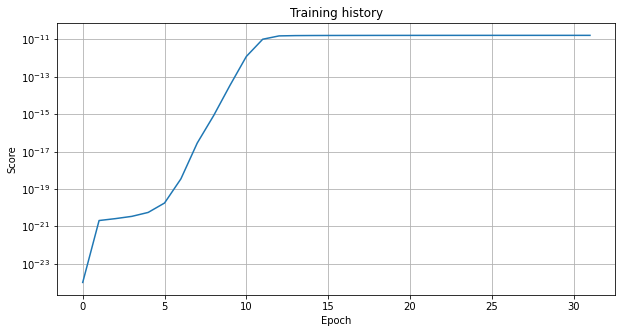

In [14]:
# Run the following script to see the changes in your HMM model parameters fitness score
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.semilogy(np.exp(t_model.monitor_.history))
ax.set_xlabel('Epoch')
ax.set_ylabel('Score')
ax.set_title('Training history')
plt.grid()
plt.show()

## Testing the trained HMM model
Now lets run the same test scripts we ran for the fixed HMM model and compare the results together:

In [15]:
# TODO replicate the same test procedure we did earlier to test your trained model.
# compare the results and explain what are your thoughts on them.
trained_estimated_states = t_model.predict(what_she_heard_as_observation)
experiement4 = pd.DataFrame({'noise': map(lambda x: noises[x], what_she_heard_as_observation.flatten()), 'room': map(lambda x: rooms[x], trained_estimated_states.flatten())})
experiement4.columns =['the sounds you make', 'her guess on where you are']
experiement4

,the sounds you make,her guess on where you are
0,Silence,Bedroom
1,Silence,Bedroom
2,Silence,Bedroom
3,Wardrobe,Bedroom
4,Silence,Bedroom
5,Silence,Bedroom
6,Silence,Bedroom
7,Silence,Bedroom
8,Silence,Bedroom
9,Flushing,Living Room


In [16]:
pd.DataFrame({'total time steps': map(lambda x: rooms[x], trained_estimated_states.flatten())}).apply(pd.value_counts)

,total time steps
Bedroom,9
Kitchen,7
Living Room,5
Bathroom,4
